In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data.csv')
data.columns = ['x1', 'x2', 'label']
X = data[['x1', 'x2']].values
y = data['label'].values
data.head()

,x1,x2,label
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1


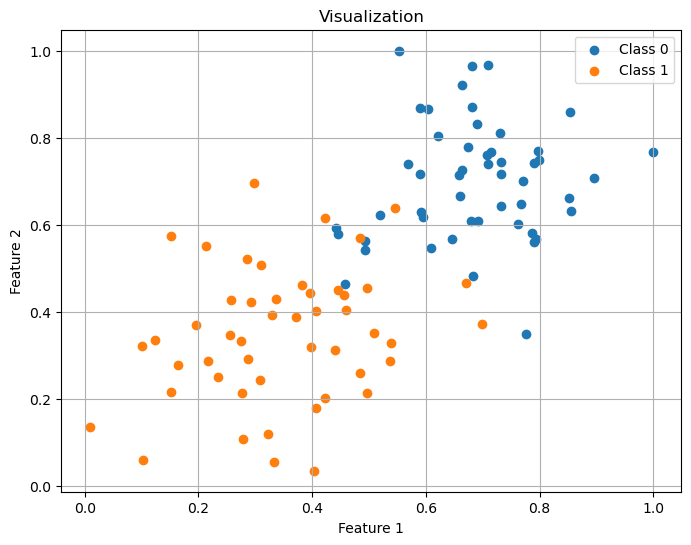

In [39]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label =f'Class {label}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization')
plt.legend()
plt.grid(True)
plt.savefig('plot1')
plt.show()

In [40]:
def heuristic_perceptron(X, y, learning_rate=0.01, max_iterations=1000):
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    weights = np.zeros(X_with_bias.shape[1])
    weights_history = [weights.copy()]
    for iteration in range(max_iterations):
        misclassified = 0
        
        for i in range(X_with_bias.shape[0]):
            prediction = 1 if np.dot(X_with_bias[i], weights) >= 0 else 0
            if prediction != y[i]:
                update = learning_rate * (y[i] - prediction) * X_with_bias[i]
                weights += update
                misclassified += 1
                weights_history.append(weights.copy())
        if misclassified == 0:
            print(f"Converged after {iteration+1} iterations")
            break
    
    return weights, weights_history

In [41]:
def plot_decision_boundary(X, y, weights_history, title):
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    
    plt.figure(figsize=(12, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    w = weights_history[0]
    if w[2] != 0:
        x1 = np.array([x_min, x_max])
        x2 = -(w[0] + w[1] * x1) / w[2]
        plt.plot(x1, x2, 'r-', label='Initial boundary')
    
    for i in range(1, len(weights_history)-1):
        w = weights_history[i]
        if w[2] != 0: 
            x1 = np.array([x_min, x_max])
            x2 = -(w[0] + w[1] * x1) / w[2]
            if i % 5 == 0: 
                plt.plot(x1, x2, 'g--', alpha=0.3)
    
    
    w = weights_history[-1]
    if w[2] != 0: 
        x1 = np.array([x_min, x_max])
        x2 = -(w[0] + w[1] * x1) / w[2]
        plt.plot(x1, x2, 'k-', label='Final boundary')
    
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig('plot2')
    plt.show()

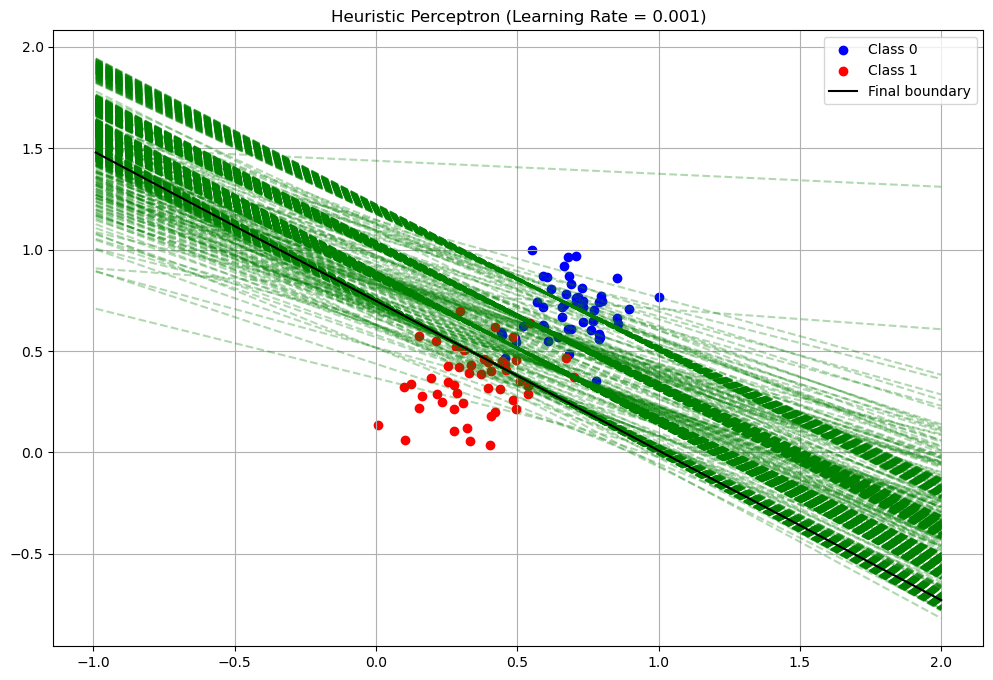

Final weights with learning rate 0.001: [ 0.008      -0.00789885 -0.01071165]


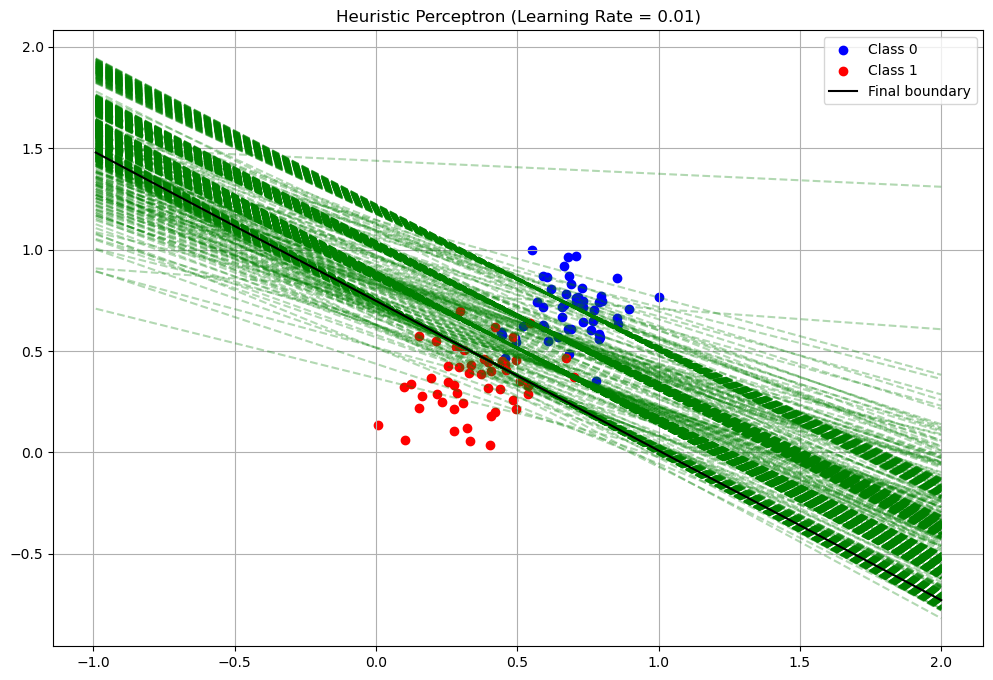

Final weights with learning rate 0.01: [ 0.08      -0.0789885 -0.1071165]


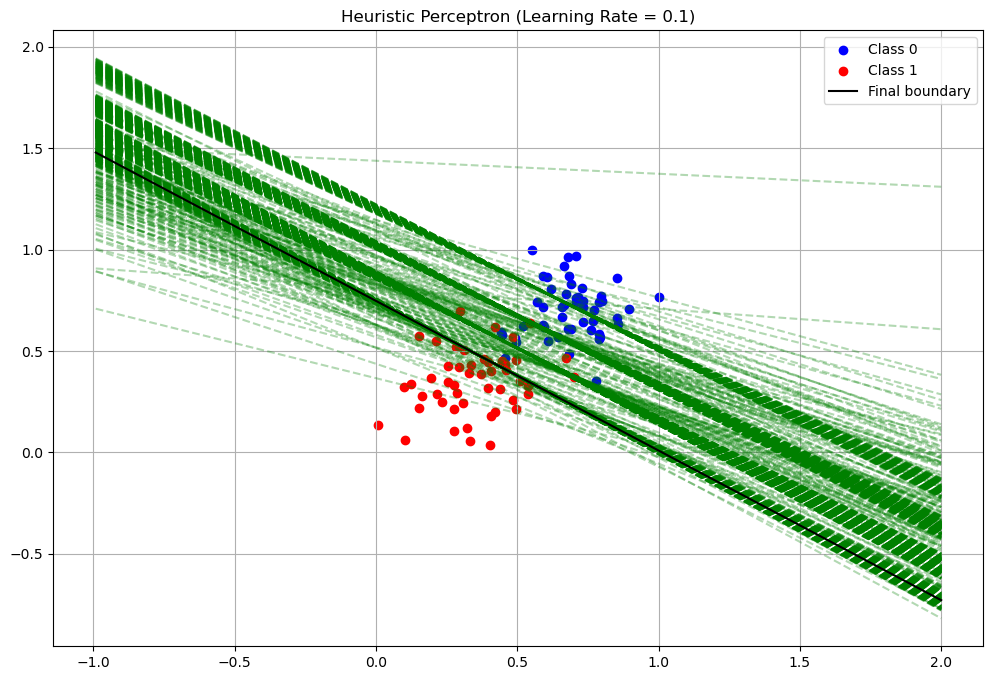

Final weights with learning rate 0.1: [ 0.8      -0.789885 -1.071165]


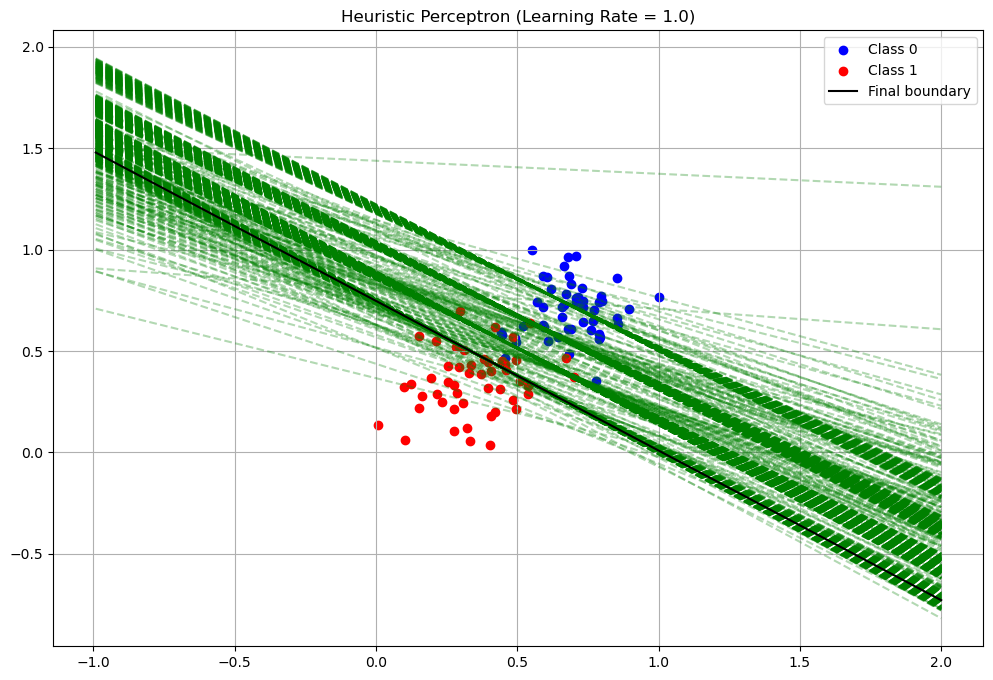

Final weights with learning rate 1.0: [  8.       -7.89885 -10.71165]


In [42]:
learning_rates = [0.001, 0.01, 0.1, 1.0]

for lr in learning_rates:
    weights, weights_history = heuristic_perceptron(X, y, learning_rate=lr)
    plot_decision_boundary(X, y, weights_history, 
                          f'Heuristic Perceptron (Learning Rate = {lr})')
    print(f"Final weights with learning rate {lr}: {weights}")

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_perceptron(X, y, learning_rate=0.01, epochs=1000):
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    weights = np.zeros(X_with_bias.shape[1])
    weights_history = [weights.copy()]
    loss_history = []
    
    for epoch in range(epochs):
        z = np.dot(X_with_bias, weights)
        predictions = sigmoid(z)
        
        epsilon = 1e-15  
        loss = -np.mean(y * np.log(predictions + epsilon) + 
                       (1 - y) * np.log(1 - predictions + epsilon))
        if epoch % 10 == 0:
            loss_history.append(loss)
        
        gradient = np.dot(X_with_bias.T, (predictions - y)) / len(y)
        weights -= learning_rate * gradient
        
        if epoch % 10 == 0 or epoch == epochs - 1:
            weights_history.append(weights.copy())
    
    return weights, weights_history, loss_history

In [44]:
def plot_loss_curve(loss_history, learning_rate):
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, len(loss_history) * 10, 10), loss_history, color = 'red')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'Log Loss vs. Epochs (Learning Rate = {learning_rate})')
    plt.grid(True)
    plt.savefig('plot3')
    plt.show()

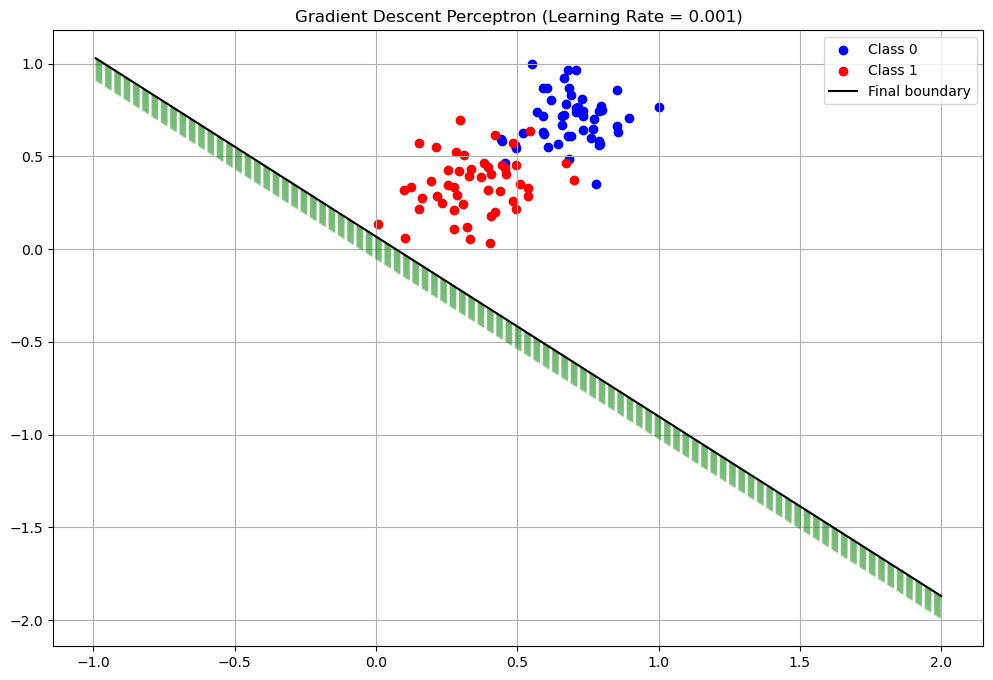

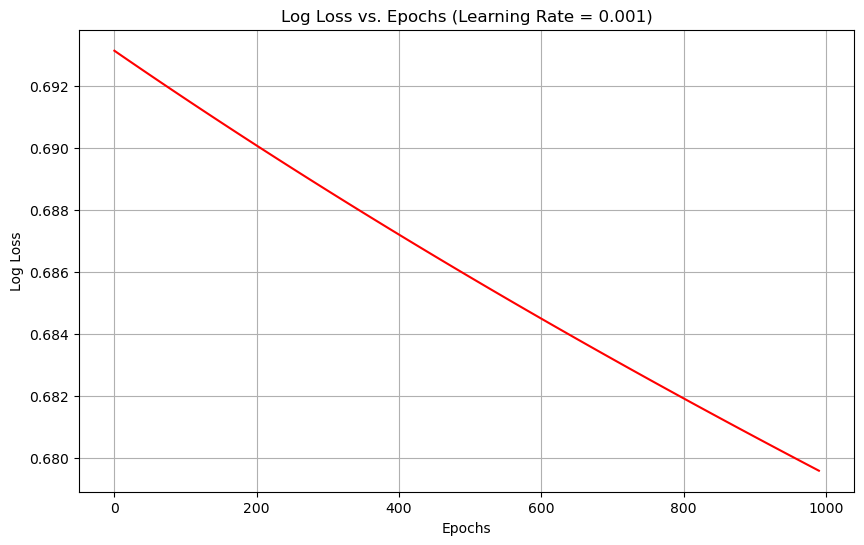

Final weights with learning rate 0.001: [ 0.00566236 -0.08113671 -0.08373356]
Final loss with learning rate 0.001: 0.6795836182509923


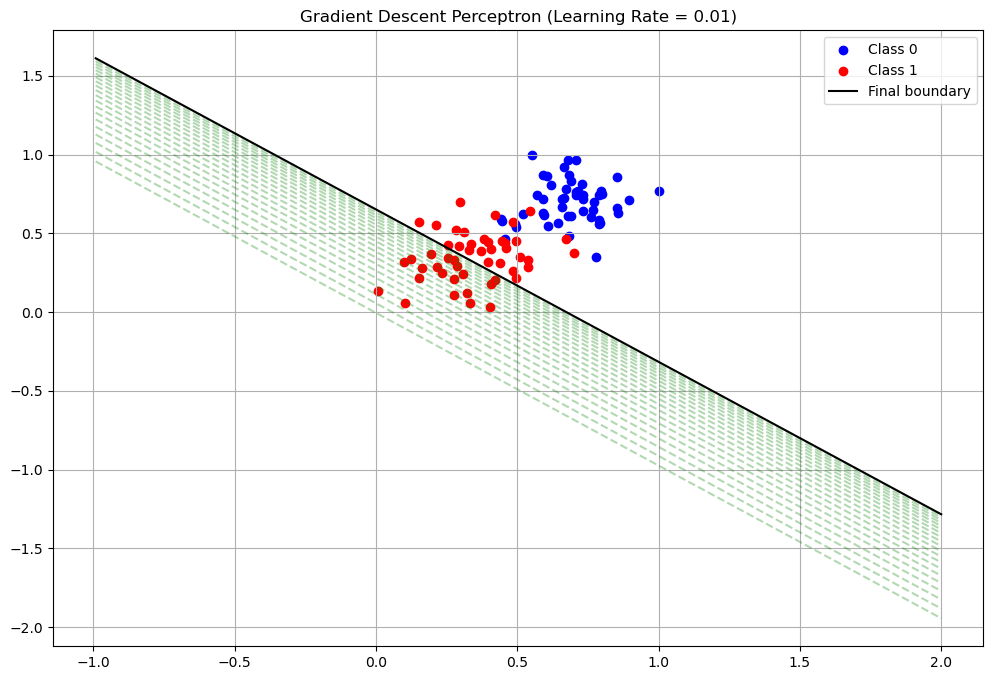

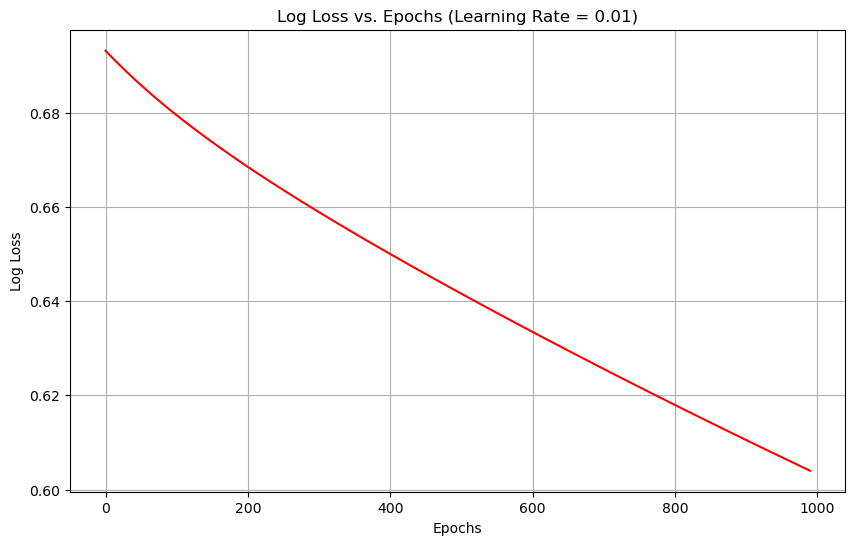

Final weights with learning rate 0.01: [ 0.39233178 -0.58234    -0.60186095]
Final loss with learning rate 0.01: 0.6040028234991303


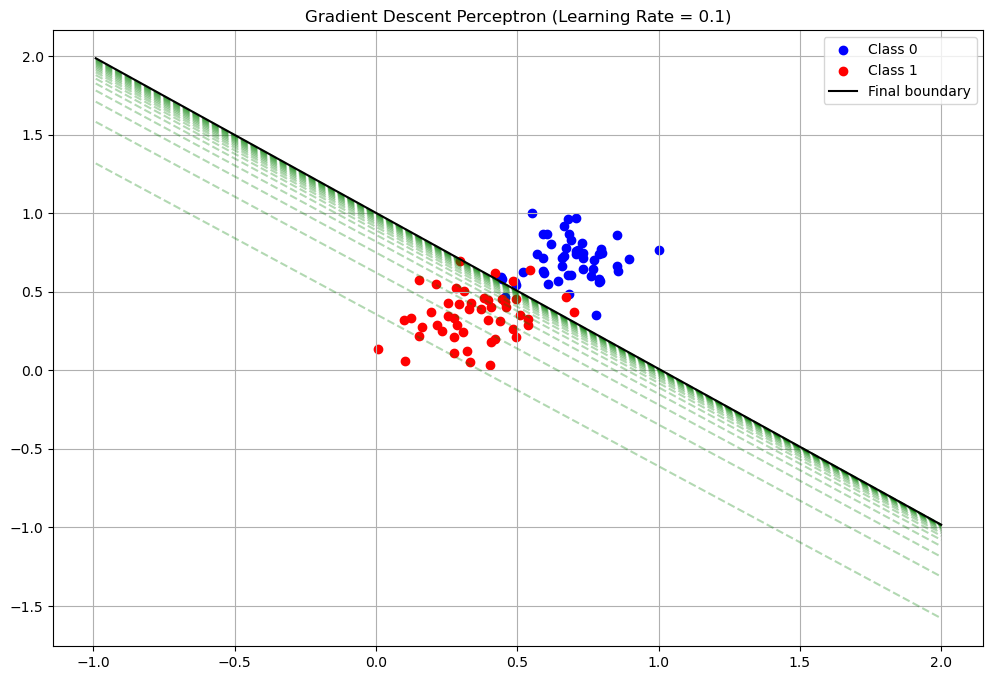

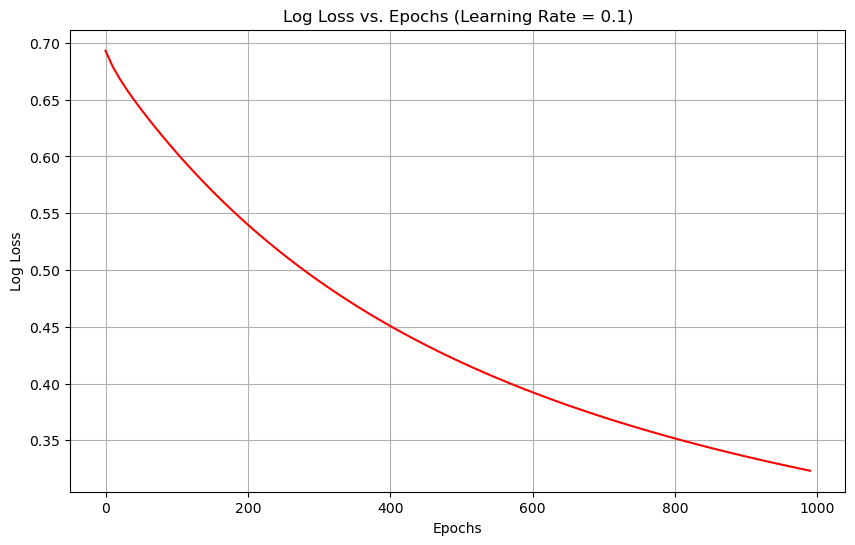

Final weights with learning rate 0.1: [ 3.35342717 -3.3218963  -3.34745262]
Final loss with learning rate 0.1: 0.32325661816489504


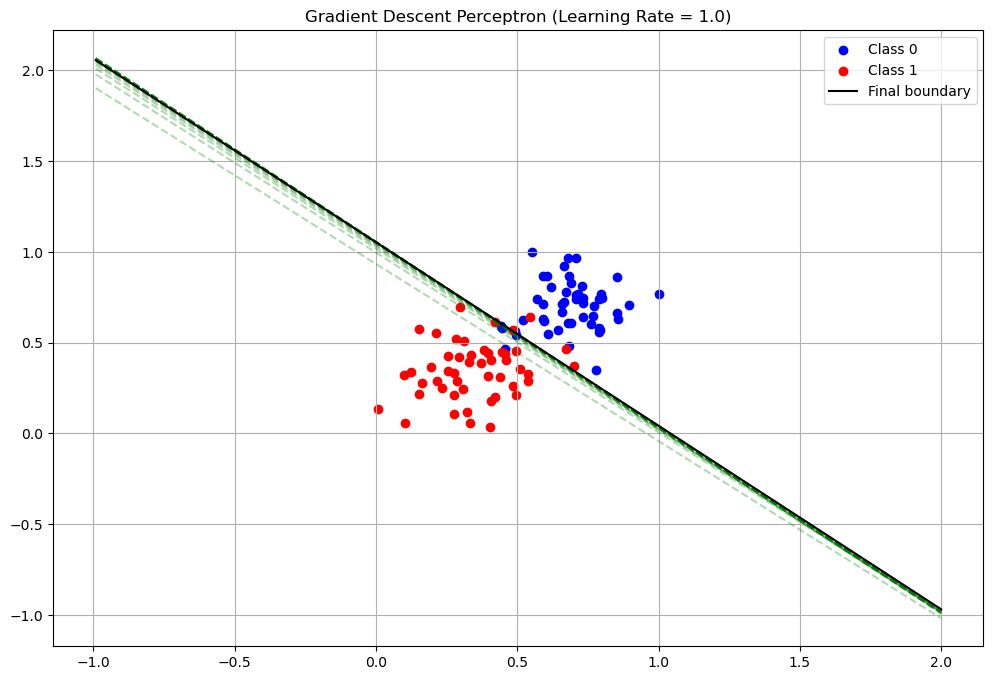

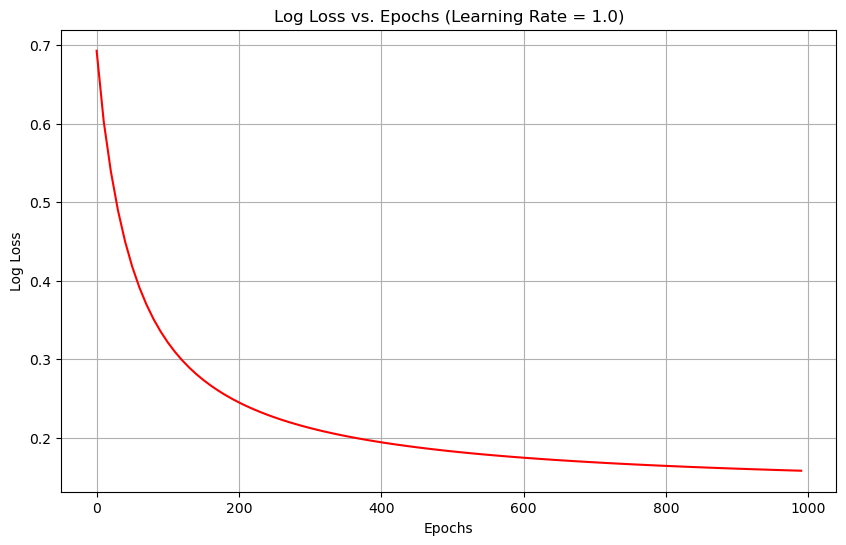

Final weights with learning rate 1.0: [ 9.65886722 -9.27150822 -9.1683187 ]
Final loss with learning rate 1.0: 0.1578328734450425


In [45]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
epochs = 1000

for lr in learning_rates:
    weights, weights_history, loss_history = gradient_descent_perceptron(
        X, y, learning_rate=lr, epochs=epochs)  
    plot_decision_boundary(X, y, weights_history, 
                          f'Gradient Descent Perceptron (Learning Rate = {lr})')  
    plot_loss_curve(loss_history, lr)
    print(f"Final weights with learning rate {lr}: {weights}")
    print(f"Final loss with learning rate {lr}: {loss_history[-1]}")